11490434/11490434 [==============================] - 1s 0us/step
정확률= 63.40000033378601
정확률= 55.91999888420105
정확률= 61.320000886917114
정확률= 65.2400016784668
정확률= 67.82000064849854
정확률= 69.20999884605408
정확률= 74.26999807357788
정확률= 81.58000111579895
정확률= 84.7000002861023
정확률= 88.24999928474426


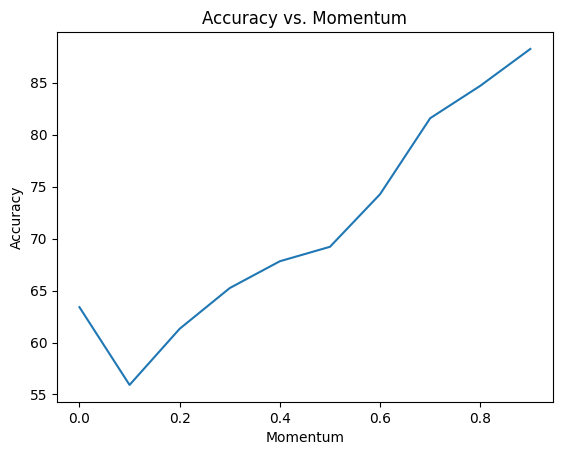

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()  #MNIST 데이터셋을 읽어 훈련,테스트집합을 각각에 저장
x_train = x_train.reshape(60000, 784) #28 X 28의 2차원 구조맵을 1차원으로 펼친다.
x_test = x_test.reshape(10000, 784) #위와 동일
x_train = x_train.astype(np.float32) / 255.0 # 원래 데이터형인 unit8을 실수연산 가능하도록 float32로 변환
x_test = x_test.astype(np.float32) / 255.0 # 255로 나누어 [0,255]범위를 [0,1]로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)  #0~10사이의 정수로 표현된 훈련,테스트코드를
y_test = tf.keras.utils.to_categorical(y_test, 10) #원핫 코드로 변환(부류가 10개)

momentum_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # 모멘텀들을 리스트로 추가
accuracies = [] #정확률을 저장하기위한 빈 리스트 추가
for momentum in momentum_values:
    mlp = Sequential() # sequential 함수로 mlp 객체를 생성
    mlp.add(Dense(units=512, activation='tanh', input_shape=(784,))) #add 함수로 층을 쌓음, Unit은 은닉층에 512개 노드배치
    mlp.add(Dense(units=10, activation='softmax')) #Dense는 완전연결층에 해당

    sgd = SGD(learning_rate=0.01, momentum=momentum) # optimizer에 SGD(스토캐스틱 경사 하강법)를 사용하도록 함수를 만듬.학습률을 0.01로 설정.
        #softmax 출력층이 활성 함수로 softmax를 사용하게 함
        
        #앞서 구축한 신경망 모델 학습, 항상 compile과fit함수가 쌍으로 등장
    mlp.compile(loss='MSE', optimizer=sgd, metrics=['accuracy']) # loss='MSE' 인수는 손실 함수로 MSE를 사용하라고 지시 위sgd를 옵티마이저에 대입
    mlp.fit(x_train, y_train, batch_size=128, epochs=3, validation_data=(x_test, y_test), verbose=0) #metrics는 학습하는 도중에 정확률을 기준으로 성능을 측정하라고 지시
    
    #성능측정
    res = mlp.evaluate(x_test, y_test, verbose=0)
    accuracies.append(res[1] * 100)
    print('정확률=',res[1]*100)

plt.plot(momentum_values, accuracies)
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Momentum')
plt.show()


모멘텀이 0.0 ~ 0.1 사이에서는 정확률이 잠시 감소하였다가, 그후로부터 0.1~0.9 까지 정확률은 계속해서 증가한다.